<a href="https://colab.research.google.com/github/pedro9olivares/ML_and_AI_for_the_Working_Analyst/blob/main/Modelo_generativo_de_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción: carga de datos y exploración

In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 4.3 MB/s 
     |████████████████████████████████| 106 kB 54.0 MB/s 


In [ ]:
import pandas as pd
import numpy as np

import re               # módulo operaciones expresiones regulares
import operator

import contractions
from collections import Counter
import random 

import matplotlib.pyplot as plt

In [ ]:
def leer_libro(archivo_txt):
  '''Función para leer un archivo en formato .txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''
  #Quitar contracciones
  texto = contractions.fix(texto)
  
  #Convertir en mínusculas 
  texto = texto.lower()

  #Quitar puntuación y números
  texto = re.sub('[^ña-z]+', ' ', texto)

  return texto

def obtener_ngramas(texto, N):
    palabras_en_texto = texto.split()
    
    ngramas = (tuple(palabras_en_texto[i:i+N]) for i in range(len(palabras_en_texto)-N+1))
    return ngramas

In [ ]:
!wget https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt

--2022-03-19 04:02:28--  https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492006 (480K) [text/plain]
Saving to: ‘HP1.txt.1’

HP1.txt.1           100%[===================>] 480.47K  --.-KB/s    in 0.04s   

2022-03-19 04:02:28 (10.9 MB/s) - ‘HP1.txt.1’ saved [492006/492006]



In [ ]:
libro = leer_libro('/content/HP1.txt')

libro[:1500]

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t P

In [ ]:
# Lista con cadenas correspondientes al pie de página para borrar.
borrar = ['Page | {} Harry Potter and the Philosophers Stone - J.K. Rowling'.format(i)\
         for i in range(2,347)]

for tx in borrar:
    libro = libro.replace(tx, '')

libro_limpio = limpiar_texto(libro)

In [ ]:
#Counter(libro_limpio.split()).items()  # Counter es una "colección" donde los elementos encontrados en
                                # cualquier objeto iterable son guardados como claves de un 
                                # diccionario y el conteo como valores


In [ ]:
palabras_frecuencia = Counter(libro_limpio.split())
vocabulario = list(palabras_frecuencia.keys())
print('Palabras en el vocabulario del libro: ', len(vocabulario))

Palabras en el vocabulario del libro:  5705


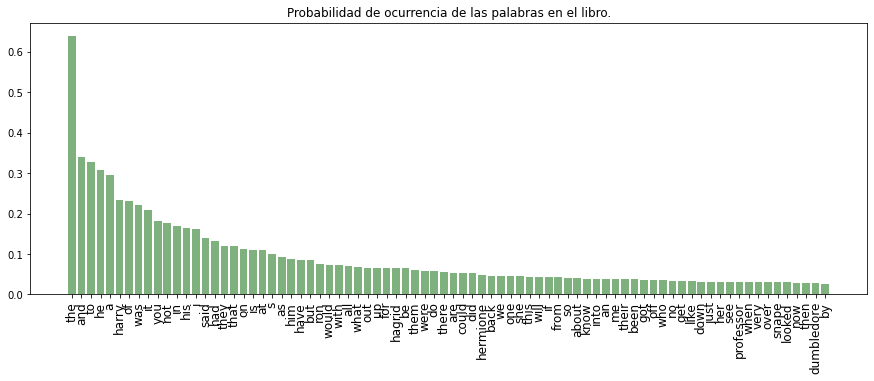

In [ ]:
Probabilidad_palabra = {k : v /len(vocabulario) for k, v in palabras_frecuencia.most_common(80)}

x, y  = zip(*sorted(Probabilidad_palabra.items(),key=operator.itemgetter(1), reverse=True))

fig = plt.figure(figsize=(15,5))
plt.bar(x,y, 
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en el libro.')
plt.show()

# Generación de texto con distribución uniforme

In [ ]:
palabras = []  # Inicializamos la lista de palabras

#  Escogemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))] 
palabras.append(palabra_selec)

''.join(palabras)

'marge'

In [ ]:
long = 10
for _ in range(long):
    palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]  
    palabras.append(palabra_selec)

' '.join(palabras)

'marge pawed boarhound rubbed served numbly in ward breeze impossible means'

In [ ]:
' '.join(np.random.choice(vocabulario,15))

'macdougal whimpering ring wandered such argued shriek tuesday wished fool achieve barrier runnin threatening p'

In [ ]:
' '.join(random.sample(libro_limpio.split(),15))    #Distribución en el libro

'you in so noise into fluttered loudly the the not be mom professor its harry'

 # Generación de texto usando n-gramas y la distribución real


In [ ]:
unigramas = palabras_frecuencia
print('Unigramas Unicos: ', len(unigramas), end='\n\n')
unigramas.most_common(5)

Unigramas Unicos:  5705



[('the', 3651), ('and', 1935), ('to', 1872), ('he', 1757), ('a', 1687)]

In [ ]:
bigramas = Counter(obtener_ngramas(libro_limpio, 2))
print('Bigramas Unicos: ', len(bigramas), end='\n\n')
bigramas.most_common(5)

Bigramas Unicos:  41299



[(('of', 'the'), 305),
 (('in', 'the'), 270),
 (('it', 'was'), 227),
 (('on', 'the'), 218),
 (('he', 'was'), 209)]

In [ ]:
trigramas = Counter(obtener_ngramas(libro_limpio,3))
trigramas.most_common(5)

[(('out', 'of', 'the'), 63),
 (('i', 'do', 'not'), 46),
 (('he', 'did', 'not'), 38),
 (('harry', 'and', 'ron'), 37),
 (('there', 'was', 'a'), 35)]

In [ ]:
def probabilidad_unigrama(token):
    if token not in unigramas:
        return 0
    return unigramas[token] / len(vocabulario)
    
def probabilidad_bigrama(secuencia):
    if secuencia not in bigramas:
        return 0
    return bigramas[secuencia] / unigramas[secuencia[0]]
    
def probabilidad_trigrama(secuencia):
    if secuencia not in trigramas:
        return 0
    return trigramas[secuencia] / bigramas[secuencia[:2]]

def selecciona_siguiente_token(secuencia):
    lista_palabras_candidatos = []
    
    # Itera por todos los tokens del vocabulario
    # calculando la probabilidad de seleccionar la siguiente palabra
    for p in vocabulario:
        Prob1 = probabilidad_unigrama(p)
        Prob2 = probabilidad_bigrama((secuencia[-1], p))
        Prob3 = probabilidad_trigrama((secuencia[-2], secuencia[-1], p)) if len(secuencia) >= 3 else 0
        
        # Usamos una interpolación lineal
        Probabilidad =  0.05*Prob1 + 0.35*Prob2 + 0.60*Prob3
        
        lista_palabras_candidatos.append((p, Probabilidad))
    
    # Ordenamos la lista de mayor a menor probabilidad
    lista_palabras_candidatos.sort(key=lambda x: x[1], reverse=True)
    return lista_palabras_candidatos[0][0]

In [ ]:
palabras = []
longitud_texto = 100

#  Escogemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))] 
palabras.append(palabra_selec)

for _ in range(longitud_texto-1):
    palabra_selec = selecciona_siguiente_token(palabras)
    palabras.append(palabra_selec)
" ".join(palabras)

'shaggy head and the philosophers stone j k rowling the school harry was not going to be a bit of a large pink face not much room dudley was now so busy with the dursleys had never seen before were the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the only one who has gone dumbledore said harry and ron were still to'